In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
f"{round(len(df[df.Survived == 1])/ len(df) * 100, 2)}% survived on Titanic"

'38.38% survived on Titanic'

In [6]:
# Survival rate by class
round(df.groupby(by = "Pclass").Survived.sum()/df.groupby(by = "Pclass").Survived.count() * 100, 2)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

In [7]:
df["age_range"] = pd.cut(df.Age,[0, 16, 65, 1e6], 3, labels = ["Child", "Adult", "Senior"])
print(df.age_range.describe())
print(" ")
print(df.groupby(by = ["Pclass", "age_range"]).PassengerId.count())

count       714
unique        3
top       Adult
freq        606
Name: age_range, dtype: object
 
Pclass  age_range
1       Child          9
        Adult        173
        Senior         4
2       Child         21
        Adult        150
        Senior         2
3       Child         70
        Adult        283
        Senior         2
Name: PassengerId, dtype: int64


In [8]:
grouped = df.groupby(by = ["Pclass", "age_range"])
round(grouped.Survived.sum() / grouped.Survived.count() * 100, 2)

Pclass  age_range
1       Child        88.89
        Adult        65.32
        Senior       25.00
2       Child        90.48
        Adult        42.67
        Senior        0.00
3       Child        40.00
        Adult        20.14
        Senior        0.00
Name: Survived, dtype: float64

In [9]:
# for col in ["PassengerId", "Name", "Cabin", "Ticket"]:
#     if col in df:
#         del df[col]

df = df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_range
0,0,3,male,22.0,1,0,7.2500,S,Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Adult
887,1,1,female,19.0,0,0,30.0000,S,Adult
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,Adult


In [10]:
# df.groupby(by = ["Pclass", "SibSp"]).describe()
df_grouped = df.groupby(by=['Pclass','SibSp'])
print (df_grouped.describe())

             Survived                                                 Age  \
                count      mean       std  min  25%  50%  75%  max  count   
Pclass SibSp                                                                
1      0        137.0  0.562044  0.497956  0.0  0.0  1.0  1.0  1.0  113.0   
       1         71.0  0.746479  0.438123  0.0  0.5  1.0  1.0  1.0   65.0   
       2          5.0  0.800000  0.447214  0.0  1.0  1.0  1.0  1.0    5.0   
       3          3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0    3.0   
2      0        120.0  0.416667  0.495074  0.0  0.0  0.0  1.0  1.0  109.0   
       1         55.0  0.581818  0.497807  0.0  0.0  1.0  1.0  1.0   55.0   
       2          8.0  0.500000  0.534522  0.0  0.0  0.5  1.0  1.0    8.0   
       3          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0   
3      0        351.0  0.236467  0.425519  0.0  0.0  0.0  0.0  1.0  249.0   
       1         83.0  0.325301  0.471335  0.0  0.0  0.0  1.0  1.0   63.0   

In [17]:
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[["Pclass", "SibSp", "Sex", "Embarked"]] = df[["Pclass", "SibSp", "Sex", "Embarked"]]
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       884 non-null    float64
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Pclass    891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Sex       891 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Users\RANDYK~1\AppData\Local\Temp/ipykernel_4092/2798741872.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
D:\Project\Machine Learning\machinelearning\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\RANDYK~1\AppData\Local\Temp/ipykernel_4092/2798741872.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))


In [18]:
colname = list(df.columns)

for i in range(len(df.columns)):
    count = df[df.columns[i]].isna().sum()
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct =count))

Column 'Survived' has 0 NAs
Column 'Pclass' has 0 NAs
Column 'Sex' has 0 NAs
Column 'Age' has 177 NAs
Column 'SibSp' has 0 NAs
Column 'Parch' has 0 NAs
Column 'Fare' has 0 NAs
Column 'Embarked' has 2 NAs
Column 'age_range' has 177 NAs


In [19]:
df_imputed["age_range"] = pd.cut(df_imputed.Age, [0, 16 , 65 ,1e6], 3, labels = ["Child", "Adult", "Senior"])
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Age        884 non-null    float64 
 2   Parch      891 non-null    int64   
 3   Fare       891 non-null    float64 
 4   Pclass     891 non-null    int64   
 5   SibSp      891 non-null    int64   
 6   Sex        891 non-null    object  
 7   Embarked   889 non-null    object  
 8   age_range  884 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB


In [20]:
df_imputed.dropna(inplace = True)
df_imputed = df_imputed[["Survived", "Age", "age_range", "Sex", "Parch", "SibSp", "Pclass", "Fare", "Embarked"]]
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   882 non-null    int64   
 1   Age        882 non-null    float64 
 2   age_range  882 non-null    category
 3   Sex        882 non-null    object  
 4   Parch      882 non-null    int64   
 5   SibSp      882 non-null    int64   
 6   Pclass     882 non-null    int64   
 7   Fare       882 non-null    float64 
 8   Embarked   882 non-null    object  
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 63.0+ KB


In [24]:
df_grouped = df_imputed.groupby(by = ["Pclass", "age_range"])
print("Percentage of survivors in each group, with imputed values:")
print(df_grouped.Survived.sum() / df_grouped.Survived.count() * 100)

Percentage of survivors in each group, with imputed values:
Pclass  age_range
1       Child        88.888889
        Adult        62.189055
        Senior       25.000000
2       Child        90.476190
        Adult        42.236025
        Senior        0.000000
3       Child        37.837838
        Adult        22.303922
        Senior        0.000000
Name: Survived, dtype: float64


In [25]:
df_sub = df_imputed[["Survived", "Age", "Pclass", "Fare"]]
df_normalized = (df_sub - df_sub.min()) / (df_sub.max() - df_sub.min())
print(df_normalized.describe())

         Survived         Age      Pclass        Fare
count  882.000000  882.000000  882.000000  882.000000
mean     0.385488    0.362094    0.653061    0.062068
std      0.486986    0.166808    0.417871    0.097168
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.271174    0.500000    0.015412
50%      0.000000    0.321438    1.000000    0.028213
75%      1.000000    0.459663    1.000000    0.059532
max      1.000000    1.000000    1.000000    1.000000


In [28]:
df_sub

,Survived,Age,Pclass,Fare
0,0,22.0,3,7.2500
1,1,38.0,1,71.2833
2,1,26.0,3,7.9250
3,1,35.0,1,53.1000
4,0,35.0,3,8.0500
...,...,...,...,...
886,0,27.0,2,13.0000
887,1,19.0,1,30.0000
888,0,25.0,3,23.4500
889,1,26.0,1,30.0000


In [30]:
df_sub.min()

Survived    0.00
Age         0.42
Pclass      1.00
Fare        0.00
dtype: float64

In [35]:
df_matrix = df_imputed[["Survived", "Age", "Pclass", "Fare"]].values

s_obj = StandardScaler()
df_matrix_norm = s_obj.fit_transform(df_matrix)
print(np.std(df_matrix_norm, axis = 0))
print(np.mean(df_matrix_norm, axis = 0))

[1. 1. 1. 1.]
[ 6.04203007e-18  1.53064762e-16 -1.89316942e-16 -6.04203007e-17]


### Visualizing the dataset

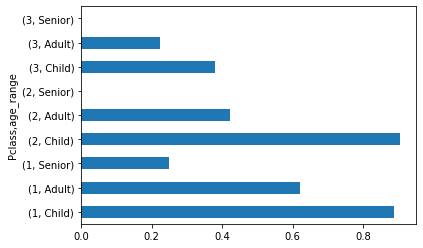

In [38]:
df_grouped = df_imputed.groupby(by = ["Pclass", "age_range"])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()
ax = survival_rate.plot(kind = 'barh')

In [39]:
survival = pd.crosstab([df_imputed["Pclass"], df_imputed["age_range"]], df_imputed.Survived.astype(bool))
survival

Survived          False  True
Pclass age_range             
1      Child          1     8
       Adult         76   125
       Senior         3     1
2      Child          2    19
       Adult         93    68
       Senior         2     0
3      Child         46    28
       Adult        317    91
       Senior         2     0

<AxesSubplot:ylabel='Pclass,age_range'>

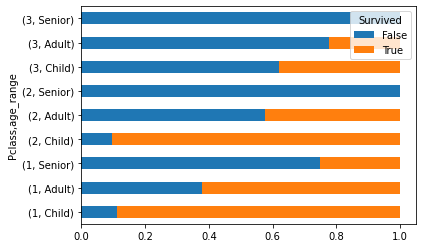

In [43]:
survival_rate = survival.div(survival.sum(1).astype(float), axis = 0)
# survival_rate.plot(kind = "barh", stacked = False)
survival_rate.plot(kind = "barh", stacked = True)

<AxesSubplot:ylabel='Pclass,Sex'>

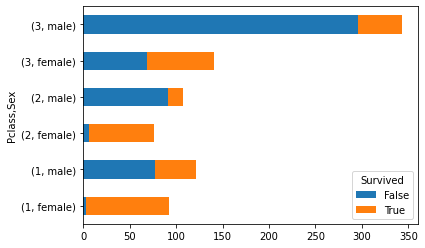

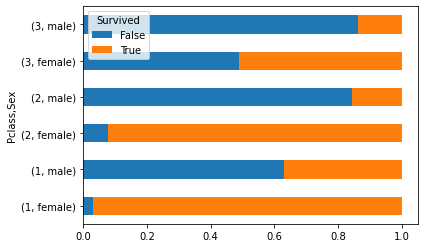

In [46]:
survival_counts = pd.crosstab([df_imputed["Pclass"], df_imputed["Sex"]], df_imputed.Survived.astype(bool))
survival_counts.plot(kind = "barh", stacked = True)
survival_rate = survival_counts.div(survival_counts.sum(1).astype(float), axis = 0)
survival_rate.plot(kind = "barh", stacked = True)

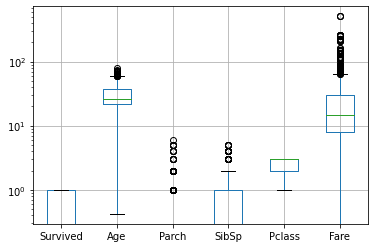

In [47]:
df_imputed.boxplot().set_yscale('log')

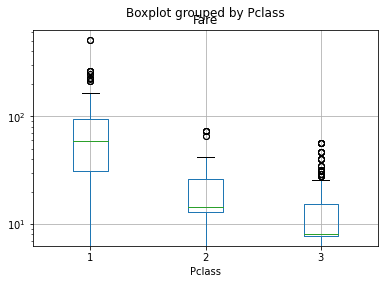

In [48]:
df_imputed.boxplot(column = "Fare", by = "Pclass").set_yscale("log")

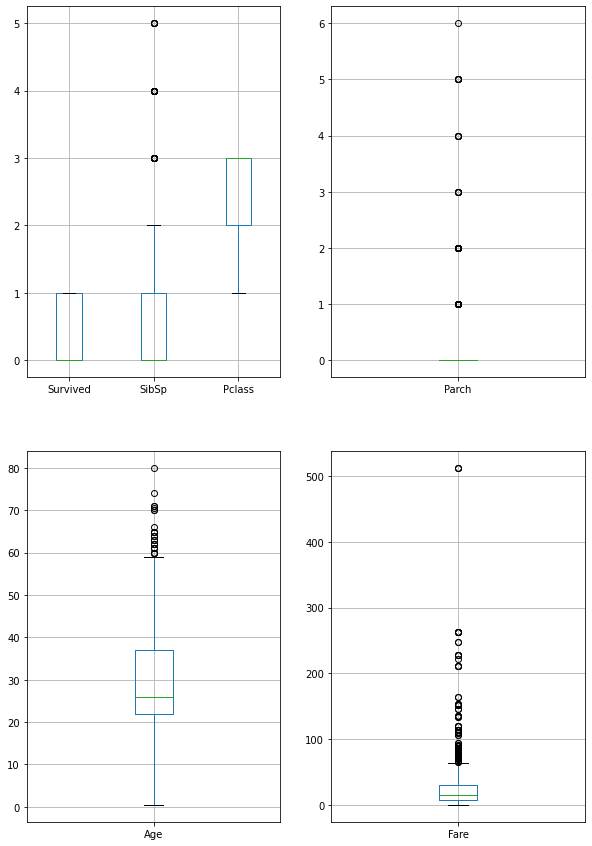

In [85]:
vars_to_plot_separate = [["Survived", "SibSp", "Pclass"], ["Parch"], ["Age"], ["Fare"]]
plt.figure(figsize = (10, 15))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(2, 2, index + 1)
    ax.set_aspect('auto')

    ax = df_imputed.boxplot(column = plot_vars)

plt.show()

# gs = gridspec.GridSpec(2, 2)
# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])
# ax3 = plt.subplot(gs[2])
# ax4 = plt.subplot(gs[3])

# ax1.plot(df_imputed.boxplot(column = ["Survived", "SibSp", "Pclass"]))
# ax2.plot(df_imputed.boxplot(column = "Parch"))

<Figure size 288x288 with 0 Axes>

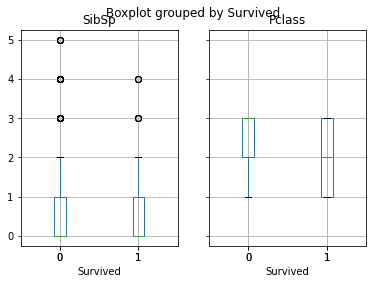

<Figure size 288x288 with 0 Axes>

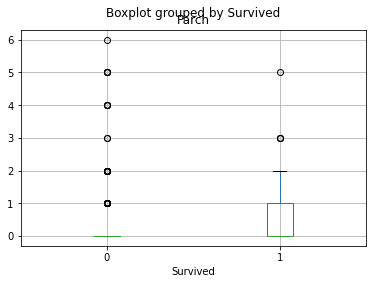

<Figure size 288x288 with 0 Axes>

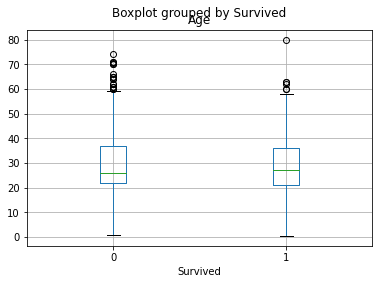

<Figure size 288x288 with 0 Axes>

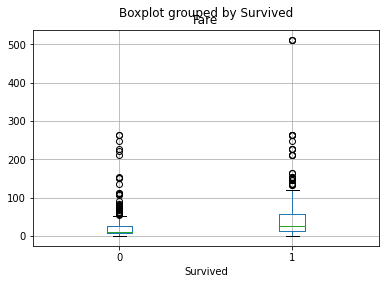

In [62]:
vars_to_plot_separate = [['SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare']]

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4, 4))
    ax = df_imputed.boxplot(column=plot_vars, by='Survived')
plt.show()

<Figure size 720x1080 with 0 Axes>

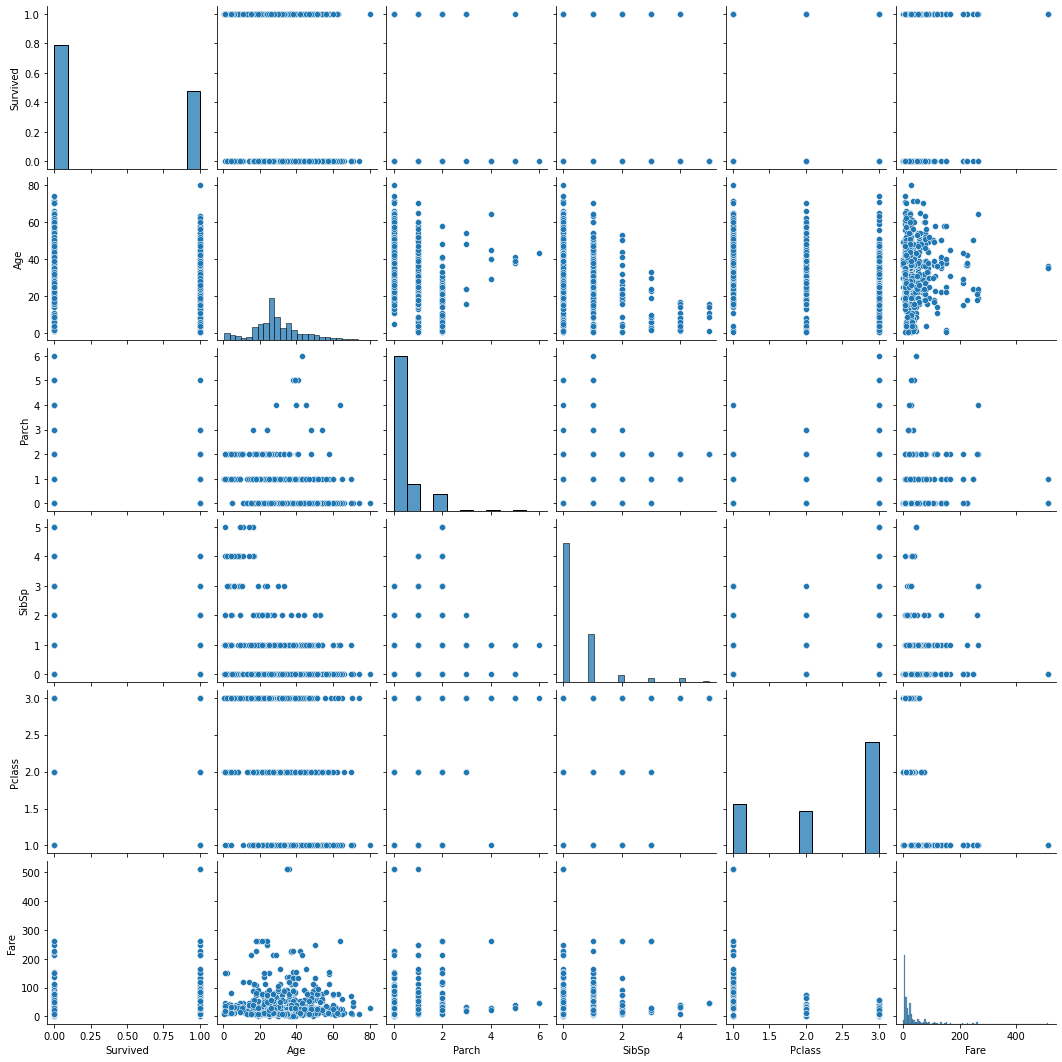

In [89]:
plt.figure(figsize = (10,15))
sns.pairplot(df_imputed)

D:\Project\Machine Learning\machinelearning\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

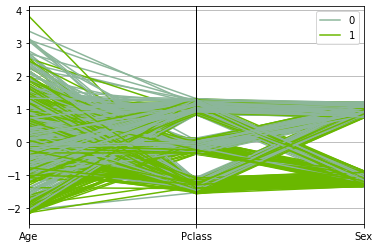

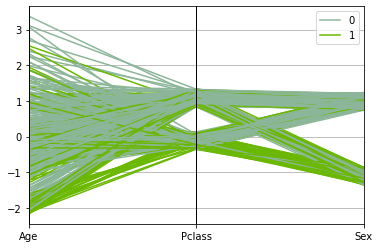

In [93]:
df_sub = df_imputed[["Survived", "Age", "Pclass", "Sex"]]
df_sub.Sex = df_sub.Sex == "male"

df_normalized = (df_sub-df_sub.mean())/ (df_sub.std())
df_normalized.Survived = df_sub.Survived

df_normalized.Pclass = df_normalized.Pclass + np.random.rand(*df_normalized.Pclass.shape) / 2
df_normalized.Sex = df_normalized.Sex + np.random.rand(*df_normalized.Sex.shape) / 2

parallel_coordinates(df_normalized, "Survived")
plt.figure()
parallel_coordinates(df_normalized[df_sub.Pclass > 1], "Survived")

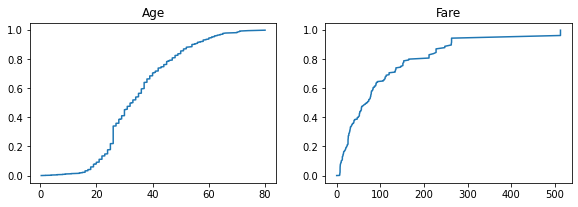

In [96]:
plt.figure(figsize = (15, 10))
for fi, feature in enumerate(["Age", "Fare"]):
    plt.subplot(3, 3, fi + 1)
    x_ax = np.sort(df_imputed[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax / np.max(y_ax)
    plt.plot(x_ax, y_ax)
    plt.title(feature)

plt.show()

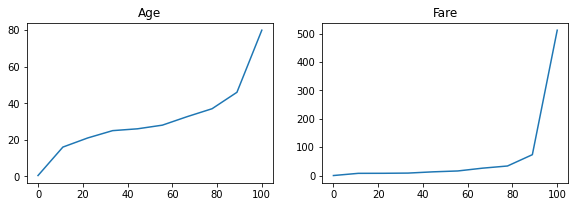

In [98]:
plt.figure(figsize = (15, 10))
for fi,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,fi+1)
    x_ax = np.linspace(0,100,10)
    y_ax = [np.percentile(df_imputed[feature], x_val) for x_val in x_ax]
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

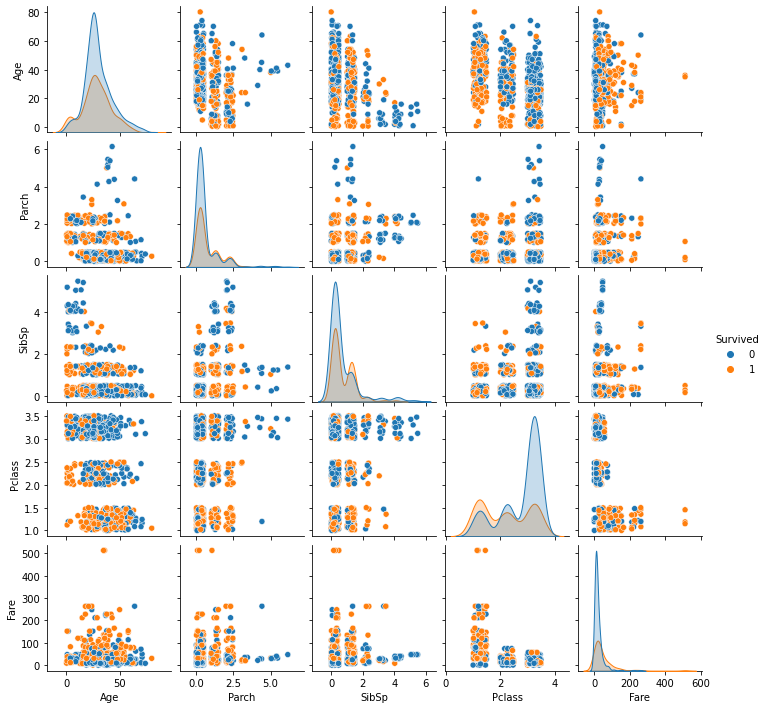

In [99]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
df_imputed_jitter = df_imputed.copy()
df_imputed_jitter[['Parch','SibSp','Pclass']] = df_imputed_jitter[['Parch','SibSp','Pclass']].values + np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="Survived", height=2)

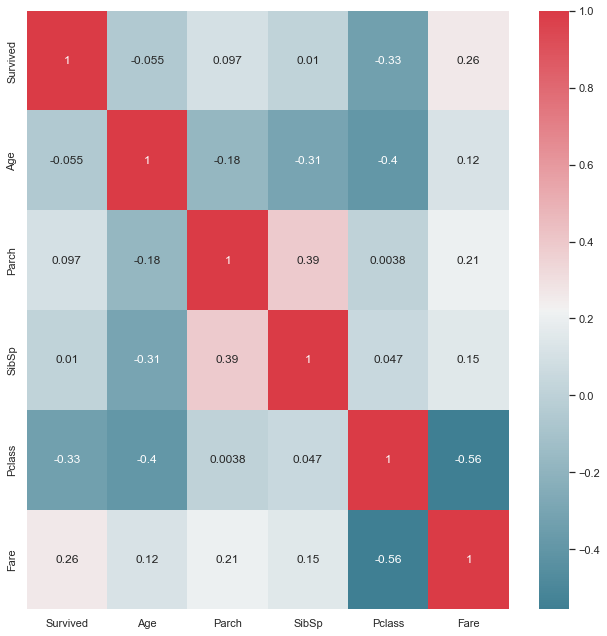

In [100]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

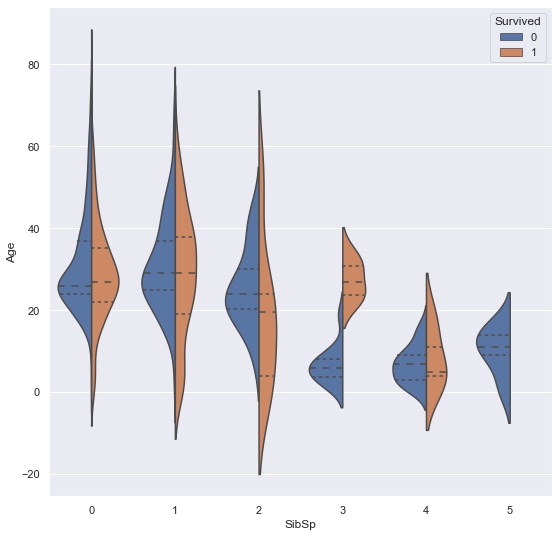

In [101]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="SibSp", y="Age", hue="Survived", data=df_imputed, 
               split=True, inner="quart")

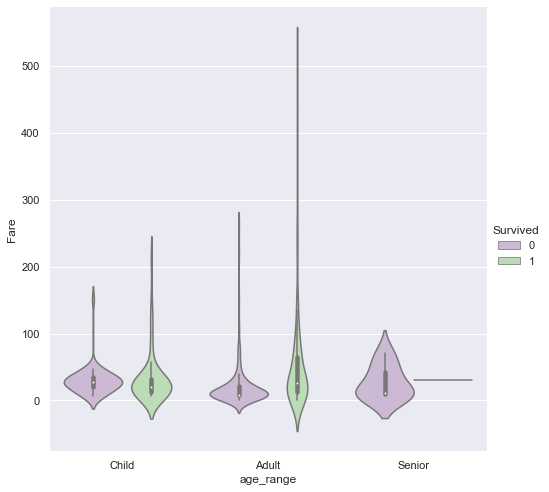

In [102]:
sns.catplot(x='age_range',y='Fare',hue='Survived',data=df_imputed, 
               kind='violin', # other options: violin, bar, box, and others 
               palette='PRGn',
               height=7,ci=95)

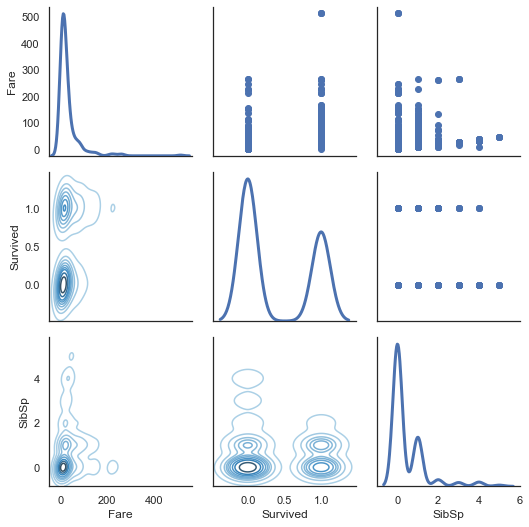

In [103]:
sns.set(style="white")

# create a plot grid
g = sns.PairGrid(df_imputed[['Fare','Survived','SibSp']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3) 